In [33]:
# Import Libraries
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

nba = pd.read_csv('nba_2013.csv')
nba


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,40,188,0.212766,305,620,0.491935,0.452,209,326,0.641,69,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,135,350,0.385714,252,539,0.467532,0.511,235,285,0.825,29,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,90,292,0.308219,492,991,0.496468,0.489,163,229,0.712,166,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,0,1,0.000000,172,403,0.426799,0.426,146,200,0.730,118,235,353,92,40,41,87,170,490,2013-2014,2013


In [34]:
nba['pts_per_game'] = nba["pts"] / nba['g']
nba

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,pts_per_game
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013,2.714286
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013,3.271605
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013,6.830189
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013,18.219178
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013,5.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,40,188,0.212766,305,620,0.491935,0.452,209,326,0.641,69,159,228,217,78,16,204,151,939,2013-2014,2013,13.041667
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,135,350,0.385714,252,539,0.467532,0.511,235,285,0.825,29,137,166,95,46,12,95,156,1144,2013-2014,2013,17.875000
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,90,292,0.308219,492,991,0.496468,0.489,163,229,0.712,166,310,476,182,167,36,165,213,1417,2013-2014,2013,17.936709
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,0,1,0.000000,172,403,0.426799,0.426,146,200,0.730,118,235,353,92,40,41,87,170,490,2013-2014,2013,5.975610


In [35]:
nba["pts_per_game"].describe()

count    481.000000
mean       8.102632
std        5.857587
min        0.000000
25%        3.483871
50%        6.689189
75%       11.666667
max       32.012346
Name: pts_per_game, dtype: float64

In [36]:
nba["3pointer_attempts_per_game"]= nba["x3pa"] / nba["g"]
nba

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,pts_per_game,3pointer_attempts_per_game
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013,2.714286,0.238095
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013,3.271605,0.000000
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013,6.830189,0.000000
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013,18.219178,4.109589
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013,5.857143,0.017857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,40,188,0.212766,305,620,0.491935,0.452,209,326,0.641,69,159,228,217,78,16,204,151,939,2013-2014,2013,13.041667,2.611111
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,135,350,0.385714,252,539,0.467532,0.511,235,285,0.825,29,137,166,95,46,12,95,156,1144,2013-2014,2013,17.875000,5.468750
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,90,292,0.308219,492,991,0.496468,0.489,163,229,0.712,166,310,476,182,167,36,165,213,1417,2013-2014,2013,17.936709,3.696203
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,0,1,0.000000,172,403,0.426799,0.426,146,200,0.730,118,235,353,92,40,41,87,170,490,2013-2014,2013,5.975610,0.012195


In [37]:
nba["3pointer_attempts_per_game"].describe()

count    481.000000
mean       1.767125
std        1.773742
min        0.000000
25%        0.085366
50%        1.311111
75%        2.944444
max        7.884615
Name: 3pointer_attempts_per_game, dtype: float64

In [38]:
nba["2pointer_attempts_per_game"]= nba["x2pa"] / nba["g"]

In [39]:
nba["2pointer_attempts_per_game"].describe()

count    481.000000
mean       4.996308
std        3.752635
min        0.000000
25%        2.066667
50%        4.061728
75%        6.878049
max       20.405797
Name: 2pointer_attempts_per_game, dtype: float64

In [40]:
nba["free_throw_attempts_per_game"]= nba["fta"] / nba["g"]

In [41]:
nba_best_attempts=nba.loc[ :, ("player","pos","pts_per_game", "3pointer_attempts_per_game", "2pointer_attempts_per_game", "free_throw_attempts_per_game")]

In [42]:
nba_best_attempts[nba_best_attempts["player"] == "Nick Young"]

,player,pos,pts_per_game,3pointer_attempts_per_game,2pointer_attempts_per_game,free_throw_attempts_per_game
477,Nick Young,SG,17.875,5.46875,8.421875,4.453125


In [43]:
sorted_pts= nba_best_attempts.groupby("player")["pts_per_game"].mean().reset_index().sort_values(by= "pts_per_game", ascending=False)

In [44]:
sorted_pts.head(3)

,player,pts_per_game
264,Kevin Durant,32.012346
65,Carmelo Anthony,27.428571
286,LeBron James,27.129870


In [45]:
sorted_3pointer_attempts= nba_best_attempts.groupby("player")["3pointer_attempts_per_game"].mean().reset_index().sort_values(by= "3pointer_attempts_per_game", ascending=False)
sorted_3pointer_attempts.head(3)

,player,3pointer_attempts_per_game
426,Stephen Curry,7.884615
403,Ryan Anderson,7.454545
95,Damian Lillard,6.756098


In [46]:
nba_best_attempts.describe()

,pts_per_game,3pointer_attempts_per_game,2pointer_attempts_per_game,free_throw_attempts_per_game
count,481.000000,481.000000,481.000000,481.000000
mean,8.102632,1.767125,4.996308,1.878395
std,5.857587,1.773742,3.752635,1.702489
min,0.000000,0.000000,0.000000,0.000000
25%,3.483871,0.085366,2.066667,0.666667
50%,6.689189,1.311111,4.061728,1.339286
75%,11.666667,2.944444,6.878049,2.539474
max,32.012346,7.884615,20.405797,9.938272


In [47]:
pd.set_option("display.max_column", None)

In [48]:
for col in nba.columns:
    pct= np.mean(nba[col].isnull())
    print('{}, {}%'.format(col, pct))

player, 0.0%
pos, 0.0%
age, 0.0%
bref_team_id, 0.0%
g, 0.0%
gs, 0.0%
mp, 0.0%
fg, 0.0%
fga, 0.0%
fg., 0.004158004158004158%
x3p, 0.0%
x3pa, 0.0%
x3p., 0.1392931392931393%
x2p, 0.0%
x2pa, 0.0%
x2p., 0.006237006237006237%
efg., 0.004158004158004158%
ft, 0.0%
fta, 0.0%
ft., 0.04158004158004158%
orb, 0.0%
drb, 0.0%
trb, 0.0%
ast, 0.0%
stl, 0.0%
blk, 0.0%
tov, 0.0%
pf, 0.0%
pts, 0.0%
season, 0.0%
season_end, 0.0%
pts_per_game, 0.0%
3pointer_attempts_per_game, 0.0%
2pointer_attempts_per_game, 0.0%
free_throw_attempts_per_game, 0.0%


In [49]:
nba.drop_duplicates()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,pts_per_game,3pointer_attempts_per_game,2pointer_attempts_per_game,free_throw_attempts_per_game
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013,2.714286,0.238095,2.000000,0.841270
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013,3.271605,0.000000,2.283951,1.679012
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013,6.830189,0.000000,5.188679,2.245283
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013,18.219178,4.109589,9.739726,4.602740
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013,5.857143,0.017857,4.428571,1.196429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,40,188,0.212766,305,620,0.491935,0.452,209,326,0.641,69,159,228,217,78,16,204,151,939,2013-2014,2013,13.041667,2.611111,8.611111,4.527778
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,135,350,0.385714,252,539,0.467532,0.511,235,285,0.825,29,137,166,95,46,12,95,156,1144,2013-2014,2013,17.875000,5.468750,8.421875,4.453125
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,90,292,0.308219,492,991,0.496468,0.489,163,229,0.712,166,310,476,182,167,36,165,213,1417,2013-2014,2013,17.936709,3.696203,12.544304,2.898734
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,0,1,0.000000,172,403,0.426799,0.426,146,200,0.730,118,235,353,92,40,41,87,170,490,2013-2014,2013,5.975610,0.012195,4.914634,2.439024


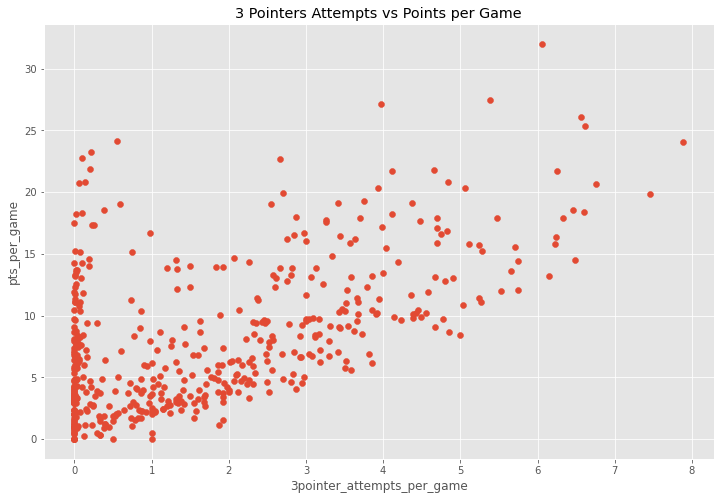

In [50]:
plt.scatter(x=nba['3pointer_attempts_per_game'], y= nba['pts_per_game'])

plt.title('3 Pointers Attempts vs Points per Game')

plt.xlabel('3pointer_attempts_per_game')
plt.ylabel('pts_per_game')
plt.show()

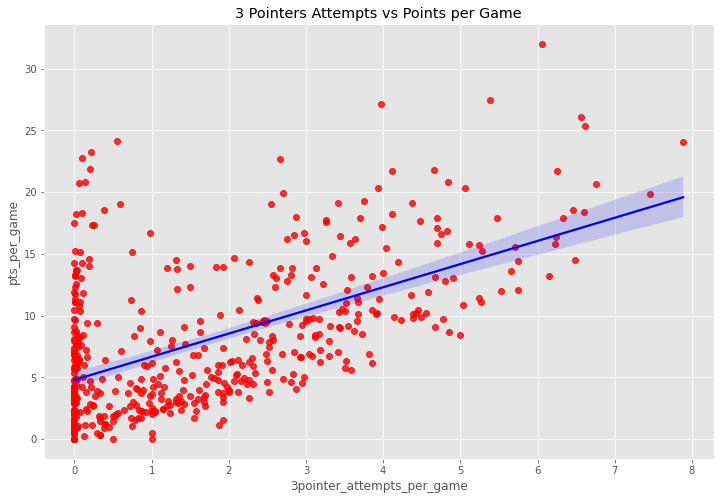

In [51]:
sns.regplot(x='3pointer_attempts_per_game', y='pts_per_game', data=nba, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title('3 Pointers Attempts vs Points per Game')

plt.xlabel('3pointer_attempts_per_game')
plt.ylabel('pts_per_game')
plt.show()

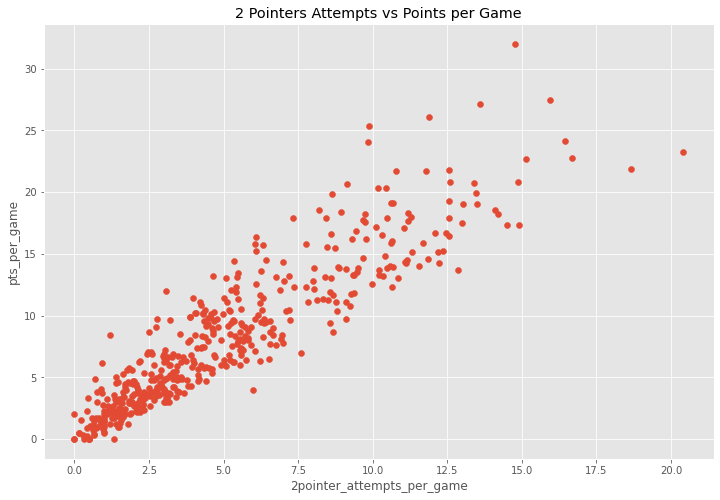

In [52]:
plt.scatter(x=nba['2pointer_attempts_per_game'], y= nba['pts_per_game'])

plt.title('2 Pointers Attempts vs Points per Game')

plt.xlabel('2pointer_attempts_per_game')
plt.ylabel('pts_per_game')
plt.show()

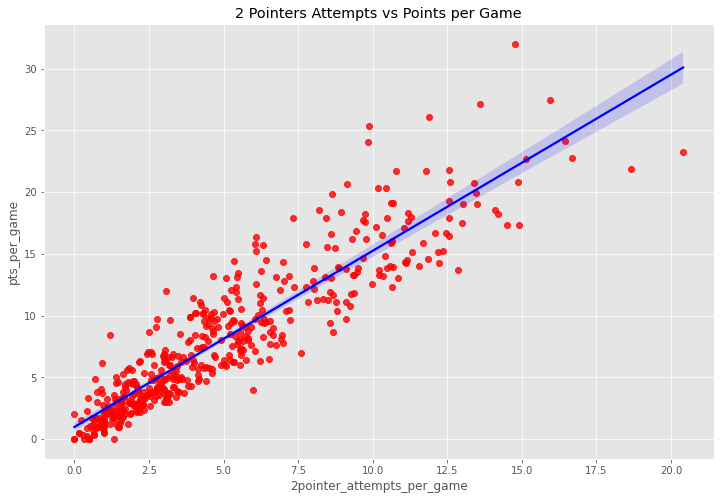

In [53]:
sns.regplot(x='2pointer_attempts_per_game', y='pts_per_game', data=nba, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title('2 Pointers Attempts vs Points per Game')

plt.xlabel('2pointer_attempts_per_game')
plt.ylabel('pts_per_game')
plt.show()

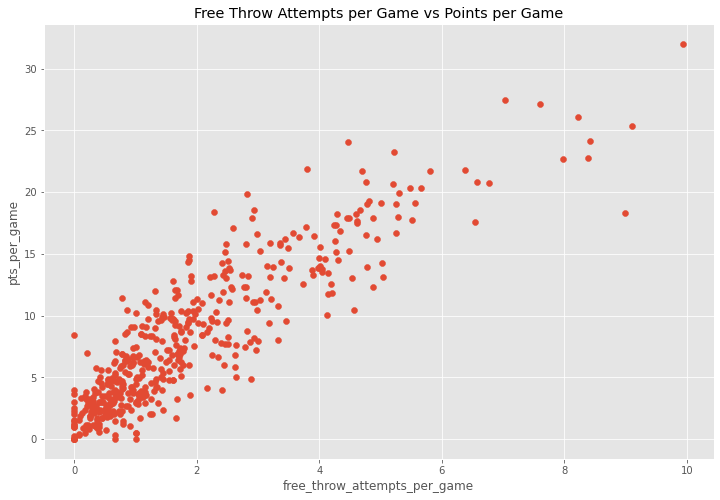

In [54]:
plt.scatter(x=nba['free_throw_attempts_per_game'], y= nba['pts_per_game'])

plt.title('Free Throw Attempts per Game vs Points per Game')

plt.xlabel('free_throw_attempts_per_game')
plt.ylabel('pts_per_game')
plt.show()

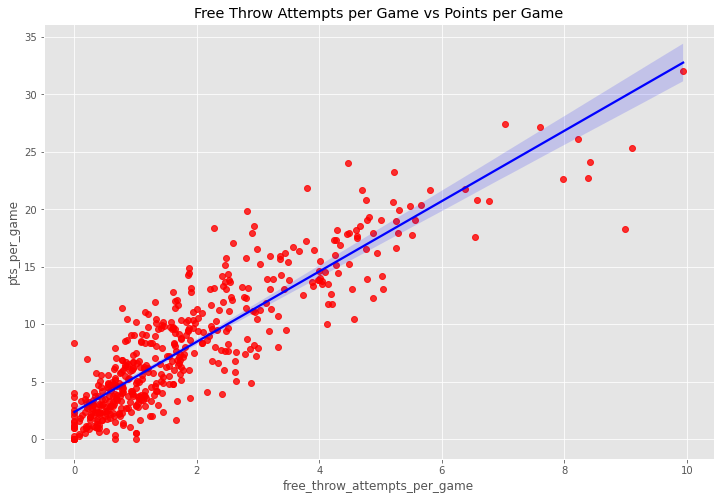

In [55]:
sns.regplot(x= "free_throw_attempts_per_game", y="pts_per_game", data=nba_best_attempts, scatter_kws={"color":"red"}, line_kws={"color": "blue"})
plt.title('Free Throw Attempts per Game vs Points per Game')

plt.xlabel('free_throw_attempts_per_game')
plt.ylabel('pts_per_game')
plt.show()

In [56]:
pd.set_option("display.max_row",15)

In [57]:
nba_best_attempts.corr()

,pts_per_game,3pointer_attempts_per_game,2pointer_attempts_per_game,free_throw_attempts_per_game
pts_per_game,1.000000,0.568002,0.913917,0.889626
3pointer_attempts_per_game,0.568002,1.000000,0.236395,0.324206
2pointer_attempts_per_game,0.913917,0.236395,1.000000,0.848222
free_throw_attempts_per_game,0.889626,0.324206,0.848222,1.000000


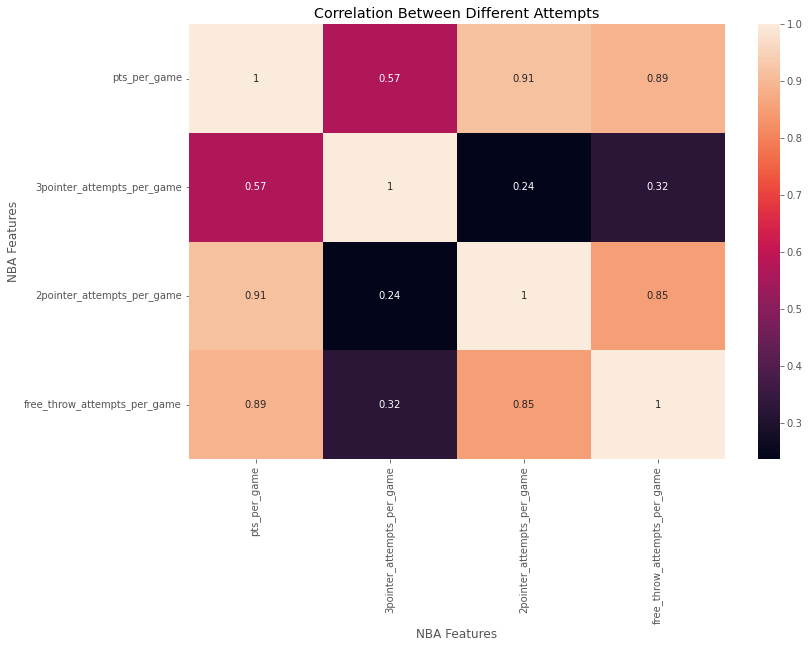

In [58]:
nba_corr_matrix = nba_best_attempts.corr()
sns.heatmap(nba_corr_matrix, annot=True)
plt.title('Correlation Between Different Attempts')

plt.xlabel('NBA Features')
plt.ylabel('NBA Features')
plt.show()

In [59]:
nba_corr_matrix = nba_best_attempts.corr
nba_corr_matrix()

,pts_per_game,3pointer_attempts_per_game,2pointer_attempts_per_game,free_throw_attempts_per_game
pts_per_game,1.000000,0.568002,0.913917,0.889626
3pointer_attempts_per_game,0.568002,1.000000,0.236395,0.324206
2pointer_attempts_per_game,0.913917,0.236395,1.000000,0.848222
free_throw_attempts_per_game,0.889626,0.324206,0.848222,1.000000


In [60]:
nba_mat = nba_corr_matrix()
mat_pair = nba_mat.unstack()
mat_pair

pts_per_game                  pts_per_game                    1.000000
                              3pointer_attempts_per_game      0.568002
                              2pointer_attempts_per_game      0.913917
                              free_throw_attempts_per_game    0.889626
3pointer_attempts_per_game    pts_per_game                    0.568002
                                                                ...   
2pointer_attempts_per_game    free_throw_attempts_per_game    0.848222
free_throw_attempts_per_game  pts_per_game                    0.889626
                              3pointer_attempts_per_game      0.324206
                              2pointer_attempts_per_game      0.848222
                              free_throw_attempts_per_game    1.000000
Length: 16, dtype: float64

In [61]:
sorted_pairs = mat_pair.sort_values()
high_corr = sorted_pairs[(sorted_pairs) > .5]
high_corr

pts_per_game                  3pointer_attempts_per_game      0.568002
3pointer_attempts_per_game    pts_per_game                    0.568002
2pointer_attempts_per_game    free_throw_attempts_per_game    0.848222
free_throw_attempts_per_game  2pointer_attempts_per_game      0.848222
pts_per_game                  free_throw_attempts_per_game    0.889626
free_throw_attempts_per_game  pts_per_game                    0.889626
pts_per_game                  2pointer_attempts_per_game      0.913917
2pointer_attempts_per_game    pts_per_game                    0.913917
pts_per_game                  pts_per_game                    1.000000
3pointer_attempts_per_game    3pointer_attempts_per_game      1.000000
2pointer_attempts_per_game    2pointer_attempts_per_game      1.000000
free_throw_attempts_per_game  free_throw_attempts_per_game    1.000000
dtype: float64